 <h1><center> Donald_Trump_Tweets_Analysis_from_2015_to_2020 </center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Section_1"> Importing Required Libraries</a></li>
        <li><a href="#Section_2"> Importing_Data_Frame</a></li>
        <li><a href="#Section_3"> Preprocessing Data_Frame </a></li>
        <li><a href="#Section_4"> Donald Trump Tweet Count by Year</a></li>
        <li><a href="#Section_5"> Frequently Tweeted Twitter handles</a></li>
        <li><a href="#Section_6"> Frequently Tweeted Twitter Words</a></li>
        <li><a href="#Section_7"> Trump tweet sentiment analysis over years</a></li>
    </ol>
</div>

<h2 id="#Section_1"> Importing Required Libraries

In [75]:
#Import Required Libraries
import os
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

<h2 id="#Section_2"> Importing_Data_Frame

In [76]:
#setting Directory to file location
os.chdir('D:/USF CourseWork/ISM 6930 TA/Assignments/Assignment_1') 

#read data into pandas dataframe
df = pd.read_csv('Donald_Trump_Tweets.csv') 

<h2 id="#Section_3">Preprocessing Data_Frame

In [77]:
#Some Exploratory Analysis
print('Shape of Dataset:',df.shape)

# dropping irrelevant columns
df = df.drop(['id_str','source','is_retweet'],axis=1)

#renaming columns to apprehencible names
df=df.rename(columns={'text':'tweet','created_at':'tweet_time'})

#printing 5 rows to check dataframe
df.head(5)

Shape of Dataset: (33042, 7)


,tweet,tweet_time,retweet_count,favorite_count
0,...replied “Yes Absolutely.” Biden calls for a...,9/14/2020 3:43,12906,55976
1,...to the families of crime victims and fallen...,9/14/2020 3:43,14622,63491
2,For the entire summer Joe Biden was SILENT as ...,9/14/2020 3:43,24334,91271
3,Our thoughts are with the two @LASDHQ Sheriff ...,9/14/2020 3:36,9755,38890
4,RT @TeamTrump: WATCH LIVE: President Donald Tr...,9/14/2020 2:09,6115,0


### There are 33042 tweets as of 11/09/2020 input and 7 columns.We have info regarding Source of tweet- iphone, windows etc; tweet text; time of creation; retweet_count; if the tweet is retweet ; number of favourites and Tweet_id


In [78]:
#Converting Tweet_time to Date time and creading a new column with tweet year
df['tweet_time']=pd.to_datetime(df['tweet_time'])
df['Tweet_Year']=df['tweet_time'].dt.year

<h2 id="#Section_4"> 1. Donald Trump Tweet Count by Year

In [79]:
#This Function will Plot a bar chart to show the tweet counts over years Starting 2015
def Tweet_Count_by_year():
    Tweet_Count_by_year=pd.DataFrame(df.groupby(df['Tweet_Year'])['tweet'].count().reset_index(name='Tweet_count'))
    ax = sns.barplot(x=Tweet_Count_by_year['Tweet_Year'], y=Tweet_Count_by_year['Tweet_count'])
    ax.set_title('Donald Trump Tweet Counts by Year')

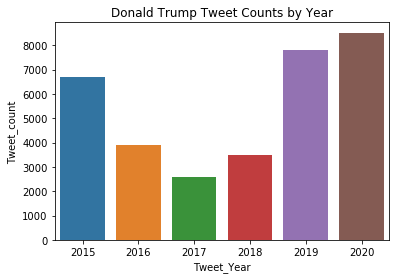

In [80]:
#Calling Function
Tweet_Count_by_year()

### Tweet Counts decreased from 2015 to 2017 and increased from 2018 to 2020. The first year of his presidency has least tweets which is less than half the initial number of tweets, however there was an increase in tweets after becoming president in 2017 till 2020 ,with highest more than 8000 tweets in 2020(even before year year completion) nearly thrice the amount of the least tweets in 2017. 

<h2 id="#Section_5"> 2. Frequently Tweeted Twitter handles

In [81]:
## Process is written in the form of functions for ease doing repitive process calling by year
## and divided into number of functions to be useful in future and improve readability 

# Function to create a Tweet_Corpus_by_year returns list of words in corpus after a basic cleaning
def Tweet_Corpus_by_year(year):
    df_by_Year=df[df['Tweet_Year']==year]
    #reading every tweet from dataframe and appending it to a tweet_string
    Tweet_Corpus_by_year =''
    for i in df_by_Year.index:
        Tweet_Corpus_by_year = Tweet_Corpus_by_year + ' ' + df_by_Year.loc[i, 'tweet']
    #strip leading and trailing spaces
    Tweet_Corpus_by_year=Tweet_Corpus_by_year.strip().lower()
    #removing hyperlinks and hastags
    Tweet_Corpus_by_year = re.sub(r'http\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'#\S+', ' ', Tweet_Corpus_by_year)
    #split sentences 
    Tweet_Corpus_words=Tweet_Corpus_by_year.split()
    return Tweet_Corpus_words

# Function to Extract Tweet_handles_by_year return dictionary of handles as key and their count as value 
def Tweet_handles_by_year(year):
    Tweet_words=Tweet_Corpus_by_year(year)
    Tweet_handles = []
    for w in Tweet_words:
        if re.search(r'^@\w+', w):
            Tweet_handles.append(w)
    #Some tweets contain '@handle,22-3-2019' etc.. we need to remove string after , 
    Tweet_handles = [h.split(',', 1)[0] for h in Tweet_handles]
    #removing tweets handles ending with other punctuations as well
    Tweet_handles = [re.sub(r'[:!?\.]+', '', h) for h in Tweet_handles]
    handles_dict=FreqDist(Tweet_handles)
    #removing @realdonaldtrump account because its a tagged handle in all the retweet mentions
    del handles_dict['@realdonaldtrump'] 
    #handles_dict.remove['@realdonaldtrump']
    return handles_dict

# Function to Extract Frequent Top_20_Tweet_handles_by_year returns top 20 values and handles
def Top_20_Tweet_handles_by_year(year):
    handles_dict=Tweet_handles_by_year(year)
    handles_freq = []
    for key, value in handles_dict.items():
        handles_freq.append((value, key))
    handles_freq.sort(reverse=True)
    top20_handles = handles_freq[0:20]
    values, handlenames = zip(*top20_handles)
    return values,handlenames

#Function to Plot Tweet Handles by year return plot for a particular year
def Tweet_Plot_by_year(year):
    values,handlenames =Top_20_Tweet_handles_by_year(year)
    plt.bar(handlenames, values)
    plt.xlabel('Twitter Handles')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Barplot of Top 20 Twitter Handles Mentioned by Donald Trump')
    return plt.show() 

# function to create Twitter handles plots over years returns plots over years in the dataframe
def Tweet_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_Plot_by_year(i)
        

Year: 2020


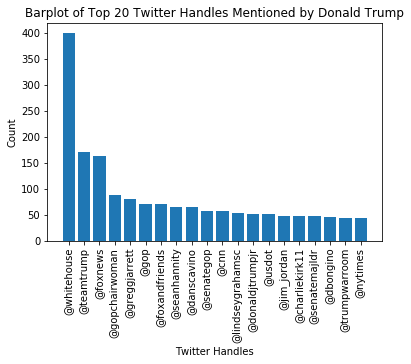

Year: 2019


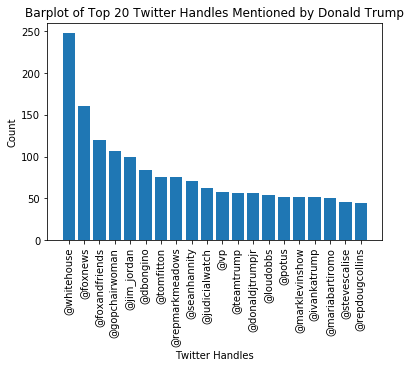

Year: 2018


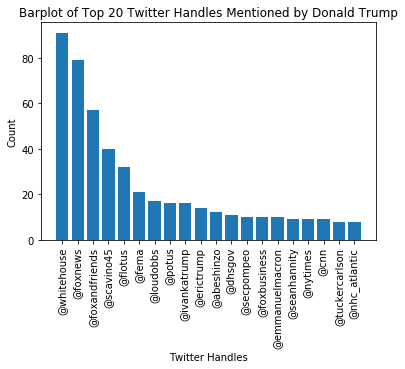

Year: 2017


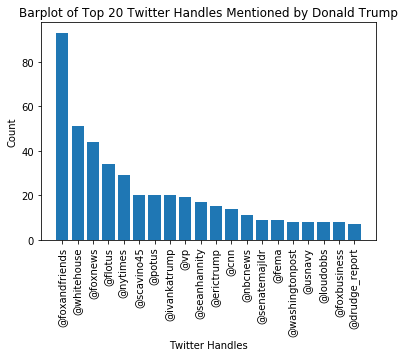

Year: 2016


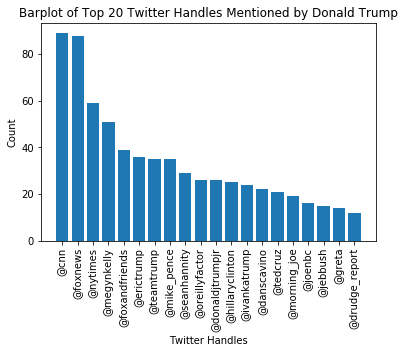

Year: 2015


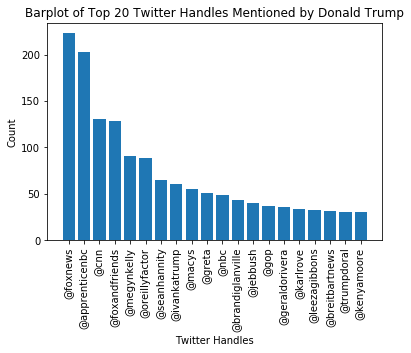

In [82]:
Tweet_Plot_over_years()

### Observation / Analysis

### 1. After becoming president, Donald trump used @whitehouse tweet handles the most. 
### 2. Intrestingly , @foxandfriends and @foxnews are one of the most used twitter handles,  alleged media outlet inclined towards republic party and support trumps.  Also there are other media outlets like @Cnn,@nytimes, @nbc
### 3. @meghankelly was one one of the most tagged journalist in the handles before his presidency, his tweets feud with Meghan kelly is well-known. 
### 4. @Teamtrump his official election team handle is most tagged handle just before the election in 2016 and also in 2019 and 2020, in between he didn't use these handles. Similarly, @gop - grand old party- democratic and presedential debates as reference

<h2 id="#Section_6"> 3. Frequently Tweeted Twitter Words

In [83]:
#This is function to create corpus and do basic cleaning, function returns a corpus_by year
def Tweet_Clean_Corpus_by_year(year):
    df_by_Year=df[df['Tweet_Year']==year]
    #reading every tweet from dataframe and appending it to a tweet_string
    Tweet_Corpus_by_year =''
    for i in df_by_Year.index:
        Tweet_Corpus_by_year = Tweet_Corpus_by_year + ' ' + df_by_Year.loc[i, 'tweet']
    #strip leading and trailing spaces
    Tweet_Corpus_by_year=Tweet_Corpus_by_year.strip().lower()
    #removing hyperlinks, mentioned handles and hashtags
    Tweet_Corpus_by_year = re.sub(r'http\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'#\S+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'@\S+', ' ', Tweet_Corpus_by_year)
    #keeping only words removing numeric values, special characters 
    Tweet_Corpus_by_year = re.sub(r'[^a-z]+', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'\s\w\s', ' ', Tweet_Corpus_by_year)
    #removing some other words - like rt for retweet and amp for '&amp'  
    Tweet_Corpus_by_year = re.sub(r'rt', ' ', Tweet_Corpus_by_year)
    Tweet_Corpus_by_year = re.sub(r'amp', ' ', Tweet_Corpus_by_year)
    return Tweet_Corpus_by_year

# this function creates the dictionary of words and their frquencies from the corpus and returns the dictionary 
def Frequent_Tweet_Words(year):
    Tweet_words = re.split(r'\W+', Tweet_Clean_Corpus_by_year(year))
    stop_words = nltk.corpus.stopwords.words('english')
    #removing words from stop words
    Tweet_words = [w for w in Tweet_words if w not in stop_words]
    #removing short words of lenghth 1 from word list 
    Tweet_words = [w for w in Tweet_words if len(w) > 1 ]
    Tweet_words_dict = nltk.FreqDist(Tweet_words)
    return Tweet_words_dict

#this function returns top20 words from the total words
def Top_20_Tweet_Words_by_year(year):
    Tweet_words_dict=Frequent_Tweet_Words(year)
    Tweet_words_freq = []
    for key, value in Tweet_words_dict.items():
        Tweet_words_freq.append((value, key))
    Tweet_words_freq.sort(reverse=True)
    top20_handles = Tweet_words_freq[0:20]
    values, Words = zip(*top20_handles)
    return values, Words

#this function returns the plot of top20 words in the tweet corpus
def Tweet_word_Plot_by_year(year):
    values, Words = Top_20_Tweet_Words_by_year(year)
    plt.bar(Words, values)
    plt.xlabel('Twitter Words')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title('Barplot of Top 20 Twitter Frequent Words used by Donald Trump')
    return plt.show()

# function to create Twitter word plots over years
def Tweet_word_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_word_Plot_by_year(i)

Year: 2020


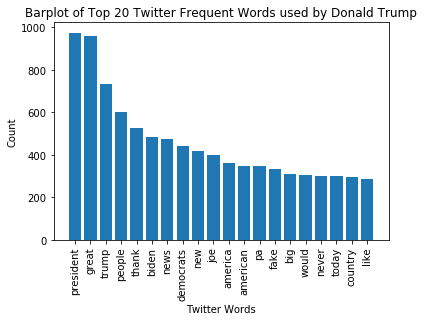

Year: 2019


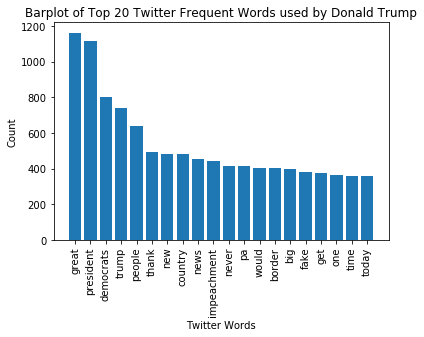

Year: 2018


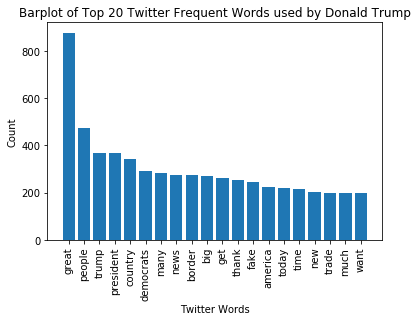

Year: 2017


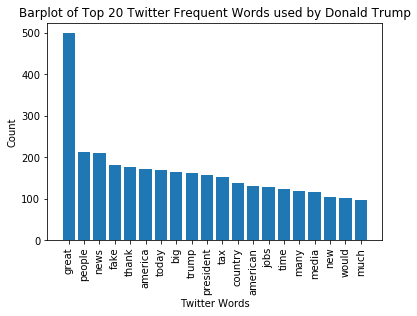

Year: 2016


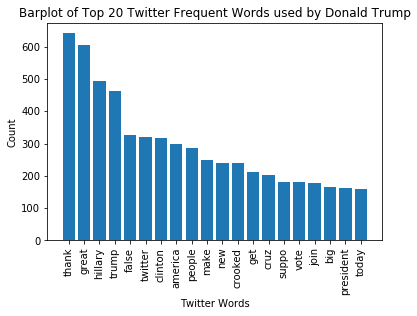

Year: 2015


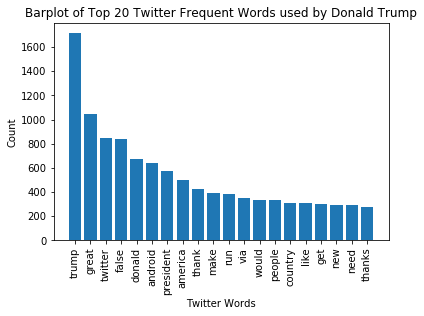

In [84]:
Tweet_word_Plot_over_years()

### Analysis / Observations
### 1. great, trump, people, president, america, make are some of the frequent used words every year. Due to his use of common phrases like MAGA- Make america great again, Trump again etc .,
### 2. Hillary is one of the most frequently used word during his election in 2016 and biden in 2020.
### 3. Impeachment was one of the most frequent used word during his 2019 tweet, during his impeachment debate.
### 4. Trump is well-known for his tweets aganist media, where in he calls news as fake/false. Evedently, most frequently used words include these words. 

<h2 id="#Section_7"> 4. Trump tweet sentiment analysis over years

In [85]:
# this function creates a tweets list and a seperate dataframe for each year and returns them
def Tweet_List_by_year(year):
    tweetlist= []
    df_by_Year=df[df['Tweet_Year']==year]
    for i in df_by_Year.index:
        tweetlist.append(df_by_Year.loc[i, 'tweet']) 
    return tweetlist,df_by_Year

# this function extracts polarity from each tweet using NLTK's SentimentIntensityAnalyzer
def Tweet_Sentiment_by_year_nltk(year):
    tweetlist,df_by_Year = Tweet_List_by_year(year)
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity = [0]*len(tweetlist)

    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ', tweet)
        tweet = re.sub(r'#', '', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
    
    df_by_Year['polarity'] = polarity
    df_by_Year['polarity'].describe()

    df_by_Year['polarity'].hist(bins=20)
    plt.title('Sentiment Histogram')
    plt.xlabel('Sentiment Polarity')
    return plt.show()

#https://elitedatascience.com/python-nlp-libraries
# implemntation of other library sentiment analyser- Textblob, there are other pretrained models in libraries like flair, tensorflow. 
#one such implementation with textblob- NaiveBayesAnalyzer - Bag of words approach
## However this analyser's outputs were quiet different and  had to use the one discussed in class
def Tweet_Sentiment_by_years_text_blob(year):
    tweetlist,df_by_Year = Tweet_List_by_year(year)
    polarity = [0]*len(tweetlist)

    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ', tweet)
        tweet = re.sub(r'#', '', tweet)
        polarity[i] = TextBlob(tweet, analyzer=NaiveBayesAnalyzer()).polarity
    
    df_by_Year['polarity'] = polarity
    df_by_Year['polarity'].describe()

    df_by_Year['polarity'].hist(bins=20)
    plt.title('Sentiment Histogram')
    plt.xlabel('Sentiment Polarity')
    return plt.show()

# tweet polarity over the years
def Tweet_Sentiment_Plot_over_years():
    #adding years to a list by looking for unique tweet years columns
    Tweet_Years=df['Tweet_Year'].unique()
    sorted(Tweet_Years)
    #Iterating over years to get all plots at once
    for i in Tweet_Years:
        print("Year:", i)
        Tweet_Sentiment_by_year_nltk(i)

Year: 2020


c:\python_3.7\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


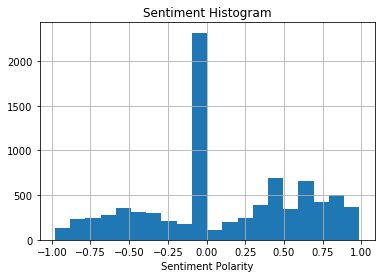

Year: 2019


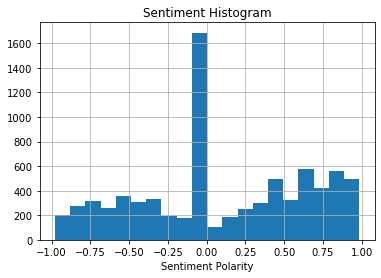

Year: 2018


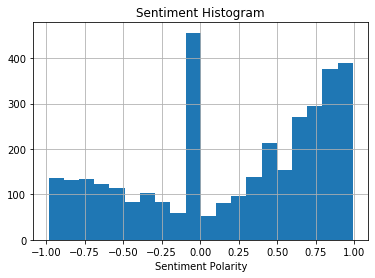

Year: 2017


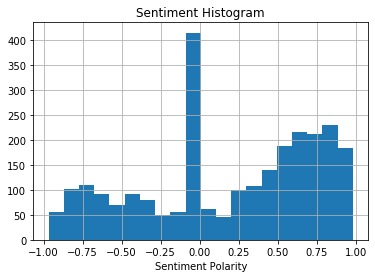

Year: 2016


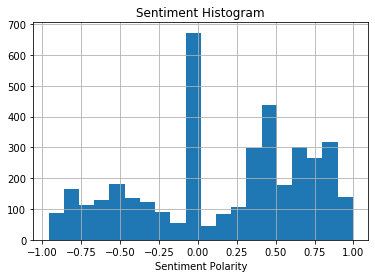

Year: 2015


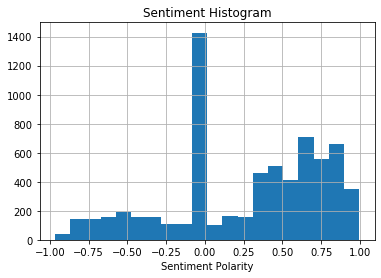

In [86]:
Tweet_Sentiment_Plot_over_years()

### Observation/ Analysis

### From the above graphs we can see Tweets of Donald trump are mostly positive and neutral over the years. There has been a steady increase of negative tweets proportion and decrease of positive tweets proportion over the years 2015 to 2020(visible from the area of graphs). one pecuilar thing is that tweets in 2017 has more negative tweets i.e, with polariy of ~ 1, whereas other years the negativie polarity was max at ~0.5.

<h2 id="#Section_7"> Thanks